# Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-suicidal-intention-dataset/master/twitter-suicidal_data.csv')

In [3]:
df.head()

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1


In [4]:
df['intention'].value_counts()

0    5121
1    3998
Name: intention, dtype: int64

# Data Preprocessing

In [5]:
def _remove_special_chars(x):
	x = re.sub(r'[^\w ]+', "", x)
	x = ' '.join(x.split())
	return x

In [6]:
df['tweet']=df['tweet'].apply(lambda x:_remove_special_chars(x))


In [7]:
def _remove_emails(x):
	return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)
df['tweet']=df['tweet'].apply(lambda x:_remove_emails(x))
 

In [8]:
def _remove_urls(x):
	return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)
df['tweet']=df['tweet'].apply(lambda x:_remove_urls(x)) 

# fitting and Evaluation

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,classification_report

In [11]:
Tf=TfidfVectorizer(max_features=20000,ngram_range=(1,3),analyzer='char')
Tf


TfidfVectorizer(analyzer='char', max_features=20000, ngram_range=(1, 3))

In [12]:
X=Tf.fit_transform(df['tweet'])
y=df['intention']


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
from sklearn.svm import LinearSVC
clf=LinearSVC()
clf.fit(x_train,y_train)

LinearSVC()

In [24]:
y_pred=clf.predict(x_test)

In [25]:
print(confusion_matrix(y_test,y_pred))

[[994  66]
 [ 64 700]]


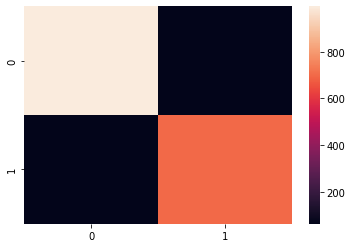

In [26]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred))

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1060
           1       0.91      0.92      0.92       764

    accuracy                           0.93      1824
   macro avg       0.93      0.93      0.93      1824
weighted avg       0.93      0.93      0.93      1824



In [28]:
x='no one cares about me . i will die alone'
vec=Tf.transform([x])
clf.predict(vec)

array([1])

In [29]:
a="i'm so happy "
vec=Tf.transform([a])
clf.predict(vec)


array([0])